In [19]:
'''

Part A, Section 1: 

Load dataset using read_csv, then display header rows using 'head' method from pandas. 
Display number of rows and columns using the 'shape' method, types using 'dtypes' and summary of statistics using 'describe'.
Use 'f' strings to display values in a clean, concise manner.

'''

import pandas as pd

df = pd.read_csv('Superstore.csv', encoding='Windows-1252')

print("First 5 rows of the dataset:")
display(df.head())

print(f"Dataset shape (rows, columns): {df.shape}")


print("\nColumn data types:")
print(df.dtypes)

print("\nSummary statistics:")
display(df.describe())


First 5 rows of the dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Dataset shape (rows, columns): (9994, 21)

Column data types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Summary statistics:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
'''

Part A, Section 2: 

Check missing values using 'isnull' then display sum using 'sum' method. 

Drop the rows with missing values using the 'dropna' method.

To convert the 'Order Date column to date/time format, first use a conditional to check if the column exists, 
then convert the content within the column by calling the 'to_datetime' method on the cleaned dataset.

To check for duplicates assign a variable to hold the amount of duplicates, and then call the duplicated method followed by the sum method
to get the sum of duplicates within the dataset, then simply call 'drop_duplicates' to pop them from the dataset.

To create the 'Profit Margin' column, assign a new column to cleaned dataset named the latter,
then divide profit by sales, and multiply the quotient by 100 to get the profit margin.

Display newly cleaned dataset by calling display on the dataset, followed by 'head' to show first five rows. 

'''

print("Missing values in each column:")
print(df.isnull().sum())


df_cleaned = df.dropna()
print(f"\nShape after dropping missing values: {df_cleaned.shape}")


if 'Order Date' in df_cleaned.columns:
    df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')
    print("\nConverted 'Order Date' to datetime format.")
else:
    print("\nColumn 'Order Date' not found in the dataset.")

duplicate_count = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

df_cleaned = df_cleaned.drop_duplicates()
print(f"Shape after removing duplicates: {df_cleaned.shape}")

if 'Profit' in df_cleaned.columns and 'Sales' in df_cleaned.columns:
    df_cleaned['Profit Margin'] = (df_cleaned['Profit'] / df_cleaned['Sales']) * 100
    print("\nAdded 'Profit Margin' column.")
else:
    print("\nColumns 'Profit' or 'Sales' not found. Cannot compute 'Profit Margin'.")

print("\nFirst 5 rows after data cleaning:")
display(df_cleaned.head())



Missing values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Shape after dropping missing values: (9994, 21)

Converted 'Order Date' to datetime format.

Number of duplicate rows: 0
Shape after removing duplicates: (9994, 21)

Added 'Profit Margin' column.

First 5 rows after data cleaning:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


In [12]:
'''

Part A, Section 3.1:

Assign a variable to contain the profit by category, group columns with 'groupby' then compare and display this variable. 
For the region with the highest sales as well as average discount per category, it is the same process. 
Except, in 'avg_discount', where the 'mean' method is called on the grouped datasets rather than the sum method in the previous two.
 
'''

category_profit = df_cleaned.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("Total Profit by Category:")
display(category_profit)
print(f"Most profitable category: {category_profit.idxmax()} (${category_profit.max():,.2f})")

region_sales = df_cleaned.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
display(region_sales)
print(f"Region with highest sales: {region_sales.idxmax()} (${region_sales.max():,.2f})")

avg_discount = df_cleaned.groupby('Category')['Discount'].mean().sort_values(ascending=False)
print("\nAverage Discount by Category:")
display(avg_discount)


Total Profit by Category:


Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

Most profitable category: Technology ($145,454.95)

Total Sales by Region:


Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

Region with highest sales: West ($725,457.82)

Average Discount by Category:


Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

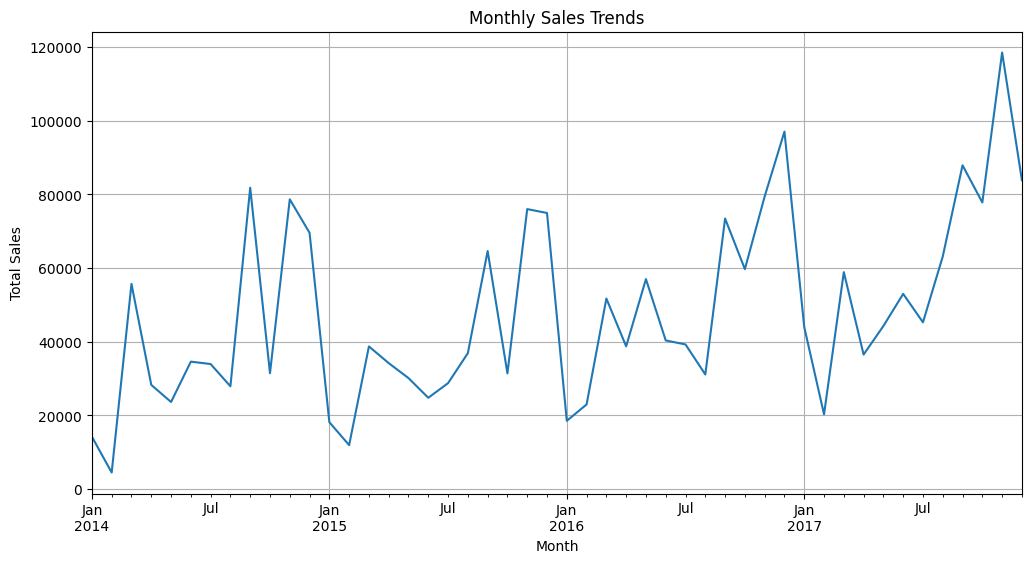

Best month for profit: December 2016 ($17,885.31)
Worst month for profit: January 2015 ($-3,281.01)


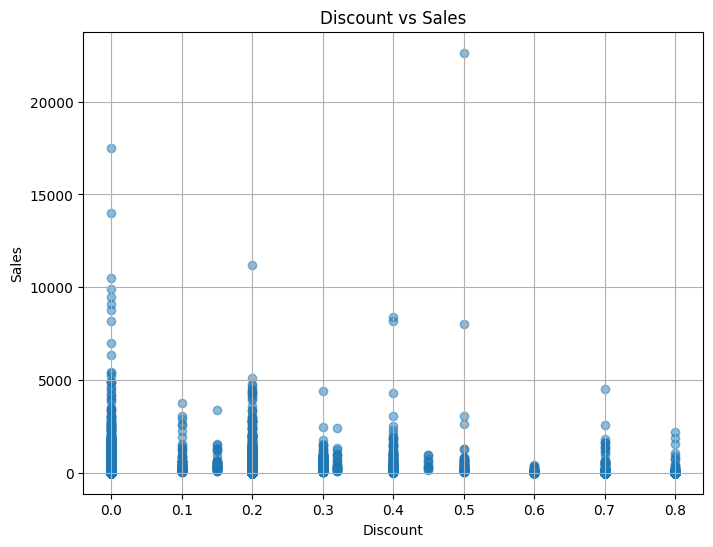

In [24]:
'''

Part A, Section 3.2:

Create a new column for the months, then group sales with month and find trends. Using pyplot from matplotlib module,
we can plot data from the csv file by assigning a names for a title and the x and y axis. 
Assign a variable to contain the profit by month, and then find minimum and maximum to find the best and worst months. 
The same process is used to compare discount vs sales.

'''

df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')

df_cleaned['Month'] = df_cleaned['Order Date'].dt.to_period('M')

monthly_sales = df_cleaned.groupby('Month')['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

monthly_profit = df_cleaned.groupby('Month')['Profit'].sum()
monthly_profit.index = monthly_profit.index.to_timestamp()

best_month = monthly_profit.idxmax().strftime('%B %Y')
worst_month = monthly_profit.idxmin().strftime('%B %Y')
print(f"Best month for profit: {best_month} (${monthly_profit.max():,.2f})")
print(f"Worst month for profit: {worst_month} (${monthly_profit.min():,.2f})")

plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Discount'], df_cleaned['Sales'], alpha=0.5)
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)
plt.show()



In [25]:
'''

Part A, Section 3.3: 

Same process as previously done, group customer column along with profit column, get the highest spenders, then display. 
Count the amount of appearances of each ship mode using 'value_counts' then display statistics.

'''

top_customers = df_cleaned.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(5)
print("Top 5 Most Profitable Customers:")
display(top_customers)

common_ship_mode = df_cleaned['Ship Mode'].value_counts()
print("\nMost Commonly Used Ship Mode:")
display(common_ship_mode)
print(f"Most common ship mode: {common_ship_mode.idxmax()} ({common_ship_mode.max()} times)")

Top 5 Most Profitable Customers:


Customer Name
Tamara Chand     8981.3239
Raymond Buch     6976.0959
Sanjit Chand     5757.4119
Hunter Lopez     5622.4292
Adrian Barton    5444.8055
Name: Profit, dtype: float64


Most Commonly Used Ship Mode:


Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Most common ship mode: Standard Class (5968 times)


In [15]:
'''

Part B, Section 1:

Find correlations between three sections using 'df_cleaned[[_______]].corr()'

'''

corr_matrix = df_cleaned[['Sales', 'Quantity', 'Profit']].corr()
print("Correlation Matrix:")
display(corr_matrix)


Correlation Matrix:


,Sales,Quantity,Profit
Sales,1.000000,0.200795,0.479064
Quantity,0.200795,1.000000,0.066253
Profit,0.479064,0.066253,1.000000


In [35]:
'''

Part B, Section 2: 

Find anomalies/outliers with negative or abnormally high profit.
Assign variables to hold orders with high profit margins and orders with a negative profit, then display.


'''

high_margin = df_cleaned[df_cleaned['Profit Margin'] > 50]
loss_orders = df_cleaned[df_cleaned['Profit'] < 0]

print(f"Number of high-profit-margin orders (>50%): {len(high_margin)}")
print(f"Number of loss-making orders (Profit < 0): {len(loss_orders)}")

print("\nExamples of High Profit Margin Orders:")
display(high_margin[['Order ID', 'Sales', 'Profit', 'Profit Margin']].head(10))

print("\nExamples of Loss-Making Orders:")
display(loss_orders[['Order ID', 'Sales', 'Profit', 'Discount']].head(10))


Number of high-profit-margin orders (>50%): 0
Number of loss-making orders (Profit < 0): 1871

Examples of High Profit Margin Orders:


,Order ID,Sales,Profit,Profit Margin



Examples of Loss-Making Orders:


,Order ID,Sales,Profit,Discount
3,US-2015-108966,957.5775,-383.0310,0.45
14,US-2015-118983,68.8100,-123.8580,0.80
15,US-2015-118983,2.5440,-3.8160,0.80
23,US-2017-156909,71.3720,-1.0196,0.30
27,US-2015-150630,3083.4300,-1665.0522,0.50
28,US-2015-150630,9.6180,-7.0532,0.70
32,US-2015-150630,6.8580,-5.7150,0.70
36,CA-2016-117590,190.9200,-147.9630,0.60
38,CA-2015-117415,532.3992,-46.9764,0.32
39,CA-2015-117415,212.0580,-15.1470,0.30


In [33]:
'''

Part B, Section 3:

Separate into quantiles to get high medium and low thresholds, define them, and create a section for the sales segmentation and apply.
Display values in sales segment using display along with the 'Sales Segment' section and 'value_counts'.

'''

quantiles = df_cleaned['Sales'].quantile([0.33, 0.66])
low_thresh, high_thresh = quantiles[0.33], quantiles[0.66]

def segment_customer(sales):
    if sales <= low_thresh:
        return 'Low'
    elif sales <= high_thresh:
        return 'Medium'
    else:
        return 'High'

df_cleaned['Sales Segment'] = df_cleaned['Sales'].apply(segment_customer)

print("Customer Segmentation by Sales:")
display(df_cleaned['Sales Segment'].value_counts())


Customer Segmentation by Sales:


Sales Segment
High      3398
Low       3298
Medium    3298
Name: count, dtype: int64